In [1]:
### importare pandas, seaborn e matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### IMPORT DEI DATI

I dati sono nella cartella in formato .csv, sotto il nome 'cars.csv'. Caricare il csv in DataFrame Pandas. NB. il dataset originale è disponibile qui: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

In [2]:
### importare i dati con pd.read_csv()
df = pd.read_csv('ilaria ruscillo - cars.csv') 

### TRAIN/TEST SPLIT

In [22]:
# importare train_test_split da sklearn.model_selection
from sklearn.model_selection import train_test_split

In [23]:
# Dividere il dataset in train/test set, utilizzando una test_size=0.25, shuffle=True, random_state=22
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22) 

### FEATURES & TARGET

In [28]:
### creare X_train e X_test selezionando solo le features 'km_driven','mileage','max_power','seats'
features = ['km_driven','mileage','max_power','seats'] 
X_train = train_df[features].copy()
X_test = test_df[features].copy()

In [30]:
### creare y_train e y_test, il nome del target è 'selling_price'
y_train = train_df['selling_price'].copy()
y_test = test_df['selling_price'].copy()

### FITTING

In [31]:
### importare RandomForestRegressor da sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor


In [38]:
### eseguire il fitting del modello sul train_df, usando la funzione .fit()

### FITTING

model = RandomForestRegressor(random_state=22)
model = model.fit(X=X_train, y=y_train)


### PREDICTION

In [39]:
### fare previsioni sia sul train_df che sul test_df usando la funzione .predict()
### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### EVALUATION

In [40]:
def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_error, r2_score
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:                 
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

In [42]:
### importare mean_absolute_error e r2_score da sklearn.metrics
# usiamo la funzione che abbiamo definito prima
from sklearn.metrics import mean_absolute_error, r2_score



TRAIN SET
MAE:  43124.24780821961
R2:  0.9905557474382869


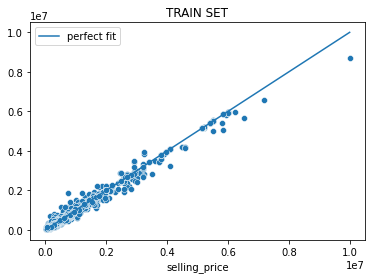

TEST SET
MAE:  90906.4179405513
R2:  0.9367020403463051


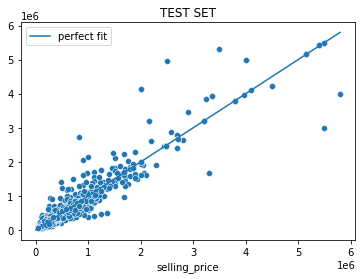

In [43]:
### calcolare MAE e R2 del modello sia sul train_set che sul test_set, e poi printarli
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

### TUNING

In [48]:
### Provare a trovare un buon valore di max_depth
depth_list = range(3,15,1)

train_r2_list = list()
test_r2_list = list()

for n in depth_list:
    print('\nMax_depth:',n)
    model = RandomForestRegressor(max_depth=n, random_state=22)
    model = model.fit(X=X_train, y=y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # usiamo la funzione che abbiamo definito prima
    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]


Max_depth: 3
TRAIN SET
MAE:  203077.36248900509
R2:  0.8531425061897688
TEST SET
MAE:  199513.93941511874
R2:  0.8390889715415479

Max_depth: 4
TRAIN SET
MAE:  180696.9937788947
R2:  0.8871331850905727
TEST SET
MAE:  179909.51628003304
R2:  0.8626695774872497

Max_depth: 5
TRAIN SET
MAE:  153895.47379515995
R2:  0.9202100250986456
TEST SET
MAE:  157655.10513178687
R2:  0.8881763183315107

Max_depth: 6
TRAIN SET
MAE:  133027.15937033985
R2:  0.9405605110816198
TEST SET
MAE:  139466.3278704093
R2:  0.9057363149833517

Max_depth: 7
TRAIN SET
MAE:  117264.50190884338
R2:  0.9549868136919574
TEST SET
MAE:  126471.25504774481
R2:  0.9182317351871941

Max_depth: 8
TRAIN SET
MAE:  102764.14578557006
R2:  0.9655726646939031
TEST SET
MAE:  115788.54461972727
R2:  0.9249801442269803

Max_depth: 9
TRAIN SET
MAE:  91232.48150761533
R2:  0.9728535070627067
TEST SET
MAE:  107586.78425546945
R2:  0.9290900312495394

Max_depth: 10
TRAIN SET
MAE:  82117.86969422421
R2:  0.9778346699695024
TEST SET
MAE:

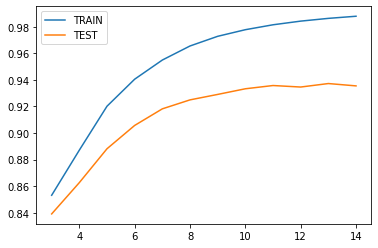

In [49]:
plt.plot(depth_list, train_r2_list, label='TRAIN')
plt.plot(depth_list, test_r2_list, label='TEST')
plt.legend()
plt.show()